### *Importing Libraries*

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

### *Load the dataset*

In [36]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### *Univariate Analysis*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


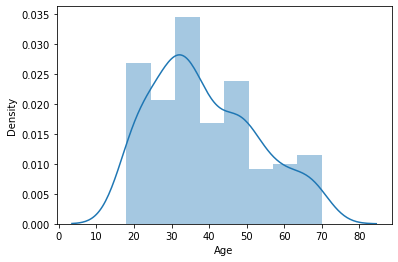

In [42]:
sns.distplot(data.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


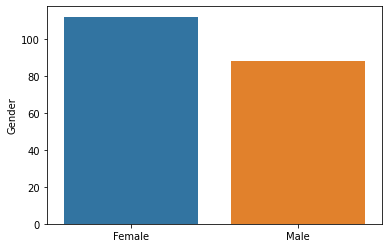

In [43]:
sns.barplot(data.Gender.value_counts().index,data.Gender.value_counts())

### *Bivariate Analysis*

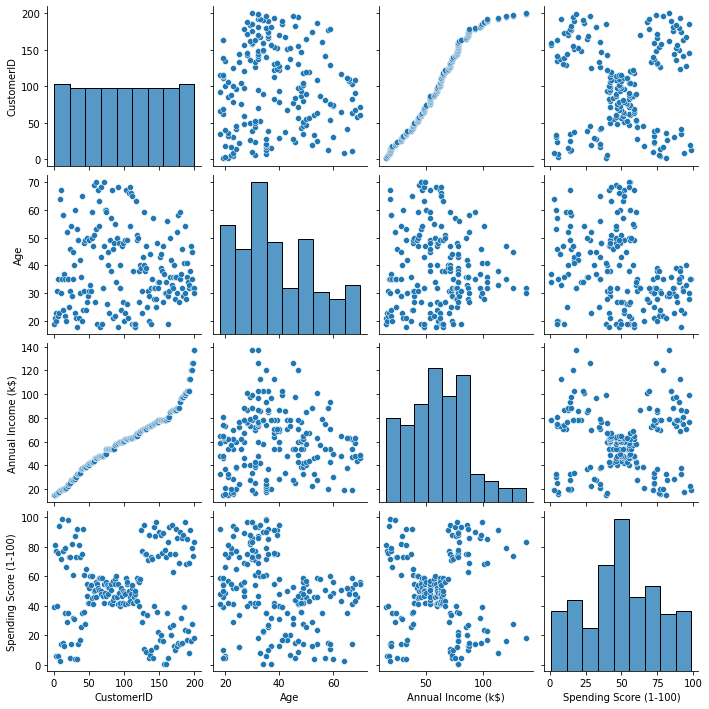

In [5]:
sns.pairplot(data)

### *Multivariate Analysis*

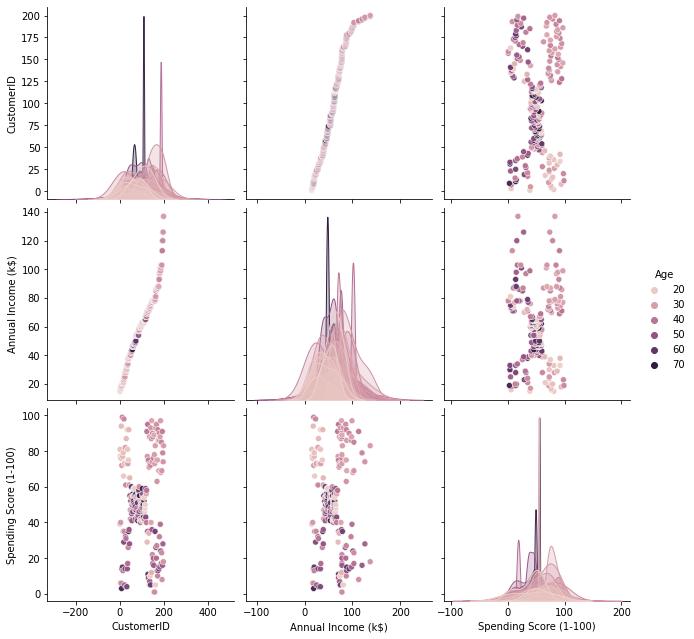

In [6]:
sns.pairplot(data,hue = 'Age',height = 3)

### *Descriptive Statistics*

In [7]:
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

### *Handle Missing Values*

In [44]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [45]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

### *Outlier Analysis*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


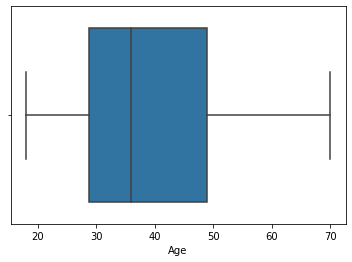

In [47]:
sns.boxplot(data.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


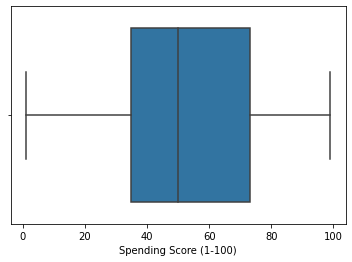

In [48]:
sns.boxplot(data['Spending Score (1-100)'])

### *Encoding Categorical Column*

In [52]:
le=LabelEncoder()

In [54]:
data.Gender=le.fit_transform(data.Gender)

In [55]:
data.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40

### *Perform Clustering Algorithm*

In [49]:
from sklearn import cluster

In [56]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(data)
    error.append(kmeans.inertia_)

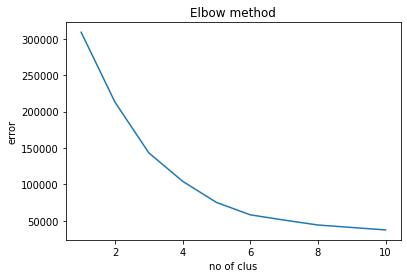

In [57]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [58]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [60]:
km_model.fit(data)

KMeans(n_clusters=3, random_state=0)

In [61]:
ykmeans =km_model.predict(data)
km_model.predict([[5.1,3.5,1.4,0.2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int32)

### *Encoding the cluster*

In [62]:
data['kclus'] = pd.Series(ykmeans)
data.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  kclus
0       1   19                  15                      39      2
1       1   21                  15                      81      2
2       0   20                  16                       6      2
3       0   23                  16                      77      2
4       0   31                  17                      40      2

In [63]:
data['kclus'].value_counts()

2    123
1     39
0     38
Name: kclus, dtype: int64

### *Split the data into Independent and Dependent variable*

In [64]:
X= data.iloc[:,:-1]
X.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40

In [65]:
y=data.kclus
y.head()

0    2
1    2
2    2
3    2
4    2
Name: kclus, dtype: int32

### *Scaling Independent variable*

In [66]:
scale=MinMaxScaler()
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

Gender       Age  Annual Income (k$)  Spending Score (1-100)
0     1.0  0.019231            0.000000                0.387755
1     1.0  0.057692            0.000000                0.816327
2     0.0  0.038462            0.008197                0.051020
3     0.0  0.096154            0.008197                0.775510
4     0.0  0.250000            0.016393                0.397959

### *Split the Data into Training and Tesing*

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

### *Model Building*

In [69]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier()
model.fit(x_train,y_train)
KNeighborsClassifier()
y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

### *Evaluation Metrics*

In [70]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Test accuracy score: ',accuracy_score(y_test,y_pred))
print('Training accuracy score: ',accuracy_score(y_train,y_pred1))

Test accuracy score:  1.0
Training accuracy score:  0.99375


In [71]:
pd.crosstab(y_test,y_pred)

col_0  0  1   2
kclus          
0      9  0   0
1      0  5   0
2      0  0  26

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        26

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

